Эксперимент 1

Описание эксперимента.

В данном эксперименте проверялось, как уровень шума в исходных данных влияет на точность восстановления зависимости между переменными при обучении модели квадратичной регрессии. Для этого создавались наборы данных, в которых значения целевой переменной искажались случайным шумом различной силы. Было рассмотрено несколько уровней шума — от очень слабого до достаточно сильного, при этом количество точек и диапазон входных значений оставались неизменными.
Обучение проводилось с помощью метода стохастического градиентного спуска, при фиксированной скорости обучения и одинаковых начальных условиях. Все параметры модели изначально устанавливались в ноль, что позволило наблюдать, насколько хорошо алгоритм способен «найти» правильные значения только за счёт данных и оптимизации. В ходе эксперимента отслеживалась ошибка модели на каждом шаге обучения, а также фиксировались финальные значения коэффициентов после завершения обучения. Затем результаты были визуализированы: на одном графике показано, как модели с разным уровнем шума приближают истинную зависимость, а на другом — как изменялась ошибка в процессе обучения. Такой подход позволил наглядно увидеть, что с ростом шума аппроксимация становится менее точной, а итоговая ошибка увеличивается, что соответствует ожидаемому поведению модели.


Эксперимент с noise_std = 0.02
Начальная инициализация: a=0.0000, b=0.0000, c=0.0000

Эксперимент с noise_std = 0.1
Начальная инициализация: a=0.0000, b=0.0000, c=0.0000

Эксперимент с noise_std = 0.25
Начальная инициализация: a=0.0000, b=0.0000, c=0.0000

Эксперимент с noise_std = 0.5
Начальная инициализация: a=0.0000, b=0.0000, c=0.0000

Эксперимент с noise_std = 1.0
Начальная инициализация: a=0.0000, b=0.0000, c=0.0000


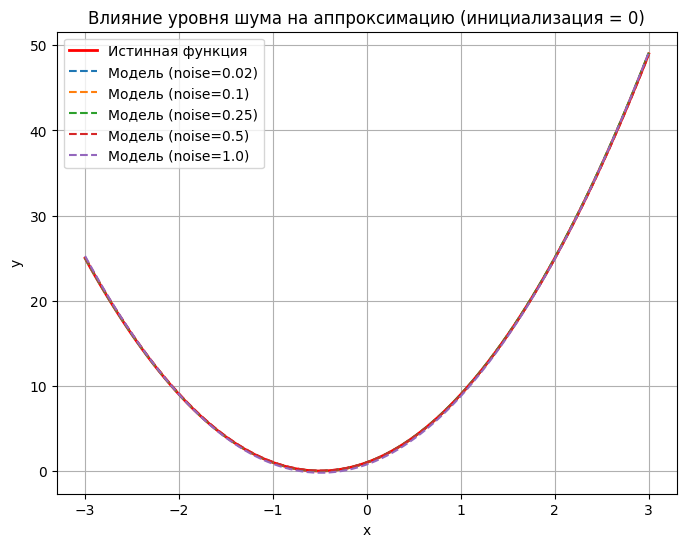

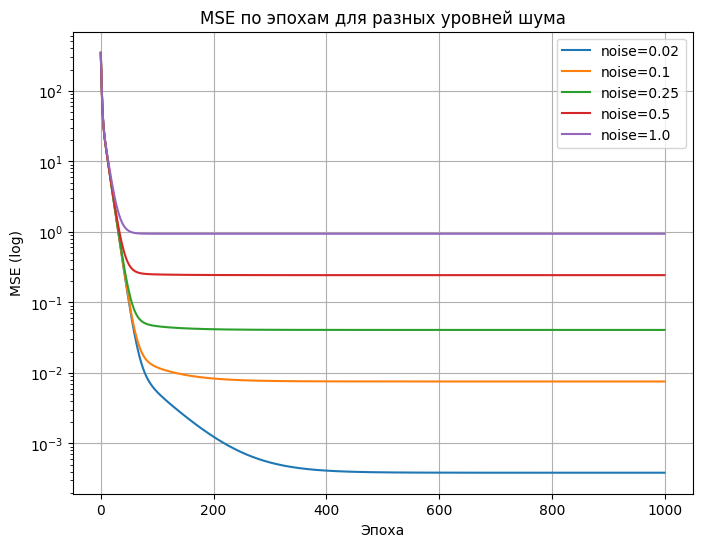


Параметры и ошибки:
noise_std 0.02: a=1.0008, b=3.9998, c=4.0001, loss=0.000385
noise_std 0.1: a=0.9864, b=3.9994, c=4.0056, loss=0.007568
noise_std 0.25: a=1.0099, b=4.0121, c=4.0087, loss=0.040700
noise_std 0.5: a=1.0180, b=3.9531, c=3.9977, loss=0.243347
noise_std 1.0: a=0.7750, b=3.9801, c=4.0464, loss=0.939380


In [24]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device("cpu")
torch.manual_seed(42)

def generate_data(n_points=100, noise_std=0.1):
    x = torch.linspace(-3, 3, n_points).unsqueeze(1).to(device)
    y_true = 1 + 4 * x + 4 * x**2
    noise = noise_std * torch.randn_like(y_true)
    y = y_true + noise
    return x, y, y_true

noise_levels = [0.02, 0.1, 0.25, 0.5, 1.0]
lr = 0.01
n_epochs = 1000

results = []
loss_curves = {}
predictions = {}

for noise_std in noise_levels:
    print(f"\nЭксперимент с noise_std = {noise_std}")
    x, y, y_true = generate_data(noise_std=noise_std)
    a = torch.zeros(1, requires_grad=True, device=device)
    b = torch.zeros(1, requires_grad=True, device=device)
    c = torch.zeros(1, requires_grad=True, device=device)
    print(f"Начальная инициализация: a={a.item():.4f}, b={b.item():.4f}, c={c.item():.4f}")

    optimizer = optim.SGD([a, b, c], lr=lr)
    loss_history = []

    for epoch in range(n_epochs):
        y_pred = a + b * x + c * x**2
        loss = torch.mean((y - y_pred)**2)
        loss_history.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    results.append({'noise_std': noise_std, 'a': a.item(), 'b': b.item(), 'c': c.item(), 'final_loss': loss.item()})
    loss_curves[noise_std] = loss_history
    predictions[noise_std] = (a + b * x + c * x**2).detach()

x_np = x.cpu().numpy()
y_true_np = y_true.cpu().numpy()

plt.figure(figsize=(8,6))
plt.plot(x_np, y_true_np, 'r', linewidth=2, label='Истинная функция')
for noise_std in noise_levels:
    plt.plot(x_np, predictions[noise_std].cpu().numpy(), '--', label=f'Модель (noise={noise_std})')
plt.title("Влияние уровня шума на аппроксимацию (инициализация = 0)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#MSE по эпохам (лог)
plt.figure(figsize=(8,6))
for noise_std in noise_levels:
    plt.plot(loss_curves[noise_std], label=f"noise={noise_std}")
plt.yscale('log')
plt.title("MSE по эпохам для разных уровней шума")
plt.xlabel("Эпоха")
plt.ylabel("MSE (log)")
plt.legend()
plt.grid(True)
plt.show()

print("\nПараметры и ошибки:")
for res in results:
    print(f"noise_std {res['noise_std']}: a={res['a']:.4f}, b={res['b']:.4f}, c={res['c']:.4f}, loss={res['final_loss']:.6f}")

Результаты.

С увеличением уровня шума точность аппроксимации квадратичной функции закономерно снижается. При минимальном шуме модель практически идеально восстанавливает истинные параметры — значения коэффициентов близки к a=1, b=4, c=4, а ошибка (MSE) минимальна. По мере роста дисперсии шума погрешность аппроксимации возрастает: параметры начинают отклоняться от истинных, особенно коэффициент при x^2, что отражает усложнение задачи обучения. При умеренных значениях шума (noise_std≤0.25) модель всё ещё хорошо воспроизводит зависимость, однако при сильном шуме (noise_std=0.5 и выше) точность заметно падает, а ошибка возрастает на порядок. Таким образом, можно сделать вывод, что градиентный спуск устойчив к умеренному уровню шумовых искажений, но при высоком уровне шума модель теряет способность точно оценивать параметры, что связано с ухудшением отношения сигнал/шум в данных.

Эксперимент 2

Описание эксперимента.

Во втором эксперименте исследовалось влияние начальной инициализации параметров модели на процесс обучения и качество итоговой аппроксимации. Поскольку метод градиентного спуска чувствителен к начальному положению параметров, целью эксперимента было определить, насколько выбор начальных значений влияет на сходимость и точность результата.

Для анализа были выбраны три варианта инициализации параметров модели:
 - нулевая инициализация — все коэффициенты модели изначально равны нулю;
 - случайная инициализация из нормального распределения — значения параметров выбирались случайно из стандартного нормального распределения;
 - инициализация из равномерного распределения U(1000,2000) — параметры принимали большие начальные значения в диапазоне от 1000 до 2000.

В каждом случае модель обучалась на одинаковом наборе данных с фиксированным уровнем шума и неизменной скоростью обучения. Для всех запусков использовался один и тот же оптимизатор (SGD) и одинаковое число эпох. После завершения обучения для каждого варианта фиксировались финальные значения параметров и итоговая ошибка (MSE). Также строились графики, показывающие:
 - как различные варианты инициализации влияют на форму аппроксимации по сравнению с истинной зависимостью;
как изменяется ошибка модели в процессе обучения (в логарифмическом масштабе).


Эксперимент с инициализацией: zeros
Начальная инициализация: a=0.0000, b=0.0000, c=0.0000

Эксперимент с инициализацией: normal
Начальная инициализация: a=0.3932, b=-0.2148, c=1.2651

Эксперимент с инициализацией: uniform
Начальная инициализация: a=1802.8765, b=1453.7872, c=1205.3604


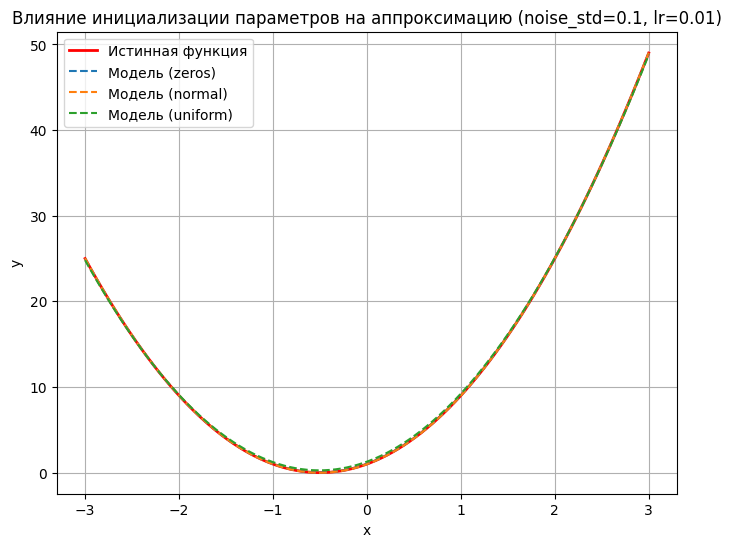

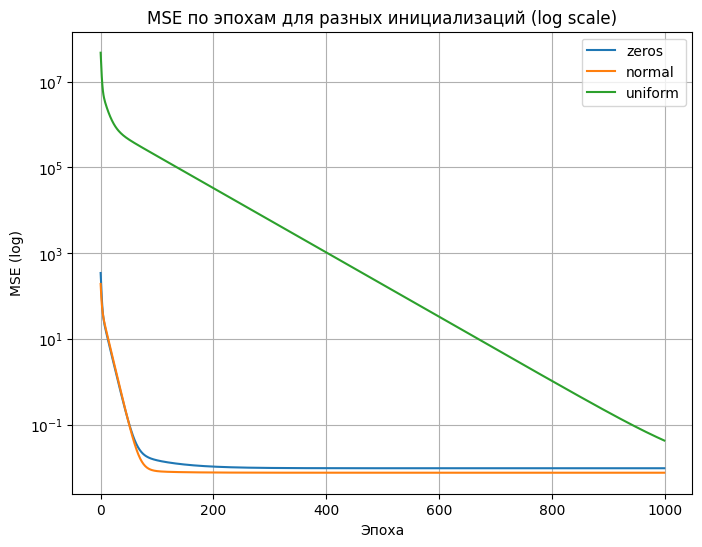


Параметры и ошибки:
   zeros: a=1.0040, b=3.9990, c=4.0006, loss=0.009626
  normal: a=0.9865, b=3.9994, c=4.0056, loss=0.007568
 uniform: a=1.2788, b=3.9982, c=3.9469, loss=0.042634


In [25]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device("cpu")
torch.manual_seed(42)

def generate_data(n_points=100, noise_std=0.1):
    x = torch.linspace(-3, 3, n_points).unsqueeze(1).to(device)
    y_true = 1 + 4 * x + 4 * x**2
    noise = noise_std * torch.randn_like(y_true)
    y = y_true + noise
    return x, y, y_true

init_types = ["zeros", "normal", "uniform"]
noise_std = 0.1
lr = 0.01
n_epochs = 1000

results = []
loss_curves = {}
predictions = {}

for init_type in init_types:
    print(f"\nЭксперимент с инициализацией: {init_type}")
    x, y, y_true = generate_data(noise_std=noise_std)

    if init_type == "zeros":
        a = torch.zeros(1, requires_grad=True, device=device)
        b = torch.zeros(1, requires_grad=True, device=device)
        c = torch.zeros(1, requires_grad=True, device=device)
    elif init_type == "normal":
        a = torch.randn(1, requires_grad=True, device=device)
        b = torch.randn(1, requires_grad=True, device=device)
        c = torch.randn(1, requires_grad=True, device=device)
    elif init_type == "uniform":
        a = (1000 + (2000 - 1000) * torch.rand(1, device=device)).requires_grad_()
        b = (1000 + (2000 - 1000) * torch.rand(1, device=device)).requires_grad_()
        c = (1000 + (2000 - 1000) * torch.rand(1, device=device)).requires_grad_()

    print(f"Начальная инициализация: a={a.item():.4f}, b={b.item():.4f}, c={c.item():.4f}")

    optimizer = optim.SGD([a, b, c], lr=lr)
    loss_history = []
    
    for epoch in range(n_epochs):
        y_pred = a + b * x + c * x**2
        loss = torch.mean((y - y_pred)**2)
        loss_history.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    results.append({'init': init_type, 'a': a.item(), 'b': b.item(), 'c': c.item(), 'final_loss': loss.item()})
    loss_curves[init_type] = loss_history
    predictions[init_type] = (a + b * x + c * x**2).detach()

x_np = x.cpu().numpy()
y_true_np = y_true.cpu().numpy()

plt.figure(figsize=(8,6))
plt.plot(x_np, y_true_np, 'r', linewidth=2, label='Истинная функция')
for init_type in init_types:
    plt.plot(x_np, predictions[init_type].cpu().numpy(), '--', label=f'Модель ({init_type})')
plt.title("Влияние инициализации параметров на аппроксимацию (noise_std=0.1, lr=0.01)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
for init_type in init_types:
    plt.plot(loss_curves[init_type], label=f"{init_type}")
plt.yscale('log')
plt.title("MSE по эпохам для разных инициализаций (log scale)")
plt.xlabel("Эпоха")
plt.ylabel("MSE (log)")
plt.legend()
plt.grid(True)
plt.show()

print("\nПараметры и ошибки:")
for res in results:
    print(f"{res['init']:>8}: a={res['a']:.4f}, b={res['b']:.4f}, c={res['c']:.4f}, loss={res['final_loss']:.6f}")

Результаты.

При нулевой и нормальной инициализации модель уверенно сходится к правильным параметрам, тогда как при инициализации большими значениями (в диапазоне от 1000 до 2000) обучение фактически не происходит из-за слишком больших градиентов и несоответствия масштабов параметров и данных. Таким образом, эксперимент подтвердил, что корректная инициализация играет большую роль для успешного обучения моделей с помощью градиентных методов.

Эксперимент 3

Описание эксперимента.

В третьем эксперименте рассматривалось влияние скорости обучения на процесс оптимизации и качество восстановления параметров модели. Цель заключалась в том, чтобы определить диапазон значений скорости обучения, при котором метод градиентного спуска демонстрирует стабильную сходимость и достигает минимальной ошибки, а также выявить значения, приводящие к расхождению.
Для эксперимента использовались сгенерированные данные с фиксированным уровнем шума. Модель, аналогично предыдущим экспериментам, представляла собой квадратичную зависимость, параметры которой подбирались методом стохастического градиентного спуска (SGD). Начальная инициализация параметров выполнялась нулями, чтобы исключить влияние начальных значений на результат. В качестве переменной исследовался только параметр скорости обучения (learning rate), который последовательно принимал значения 0.001, 0.01, 0.1, 0.5, 0.7 и 0.9. Для каждого случая обучение проводилось в течение 1000 эпох.
В процессе эксперимента отслеживалась динамика ошибки (MSE) на каждой эпохе, а после завершения обучения фиксировались итоговые значения параметров и финальная ошибка. Полученные результаты визуализировались в двух формах:
 - на первом графике — предсказания моделей при разных скоростях обучения относительно истинной функции;
 - на другом — изменение значения ошибки (в логарифмическом масштабе) в процессе обучения для каждого значения скорости.


Эксперимент со скоростью обучения: lr = 0.001
Начальная инициализация: a=0.0000, b=0.0000, c=0.0000

Эксперимент со скоростью обучения: lr = 0.01
Начальная инициализация: a=0.0000, b=0.0000, c=0.0000

Эксперимент со скоростью обучения: lr = 0.1
Начальная инициализация: a=0.0000, b=0.0000, c=0.0000

Эксперимент со скоростью обучения: lr = 0.5
Начальная инициализация: a=0.0000, b=0.0000, c=0.0000

Эксперимент со скоростью обучения: lr = 0.7
Начальная инициализация: a=0.0000, b=0.0000, c=0.0000

Эксперимент со скоростью обучения: lr = 0.9
Начальная инициализация: a=0.0000, b=0.0000, c=0.0000


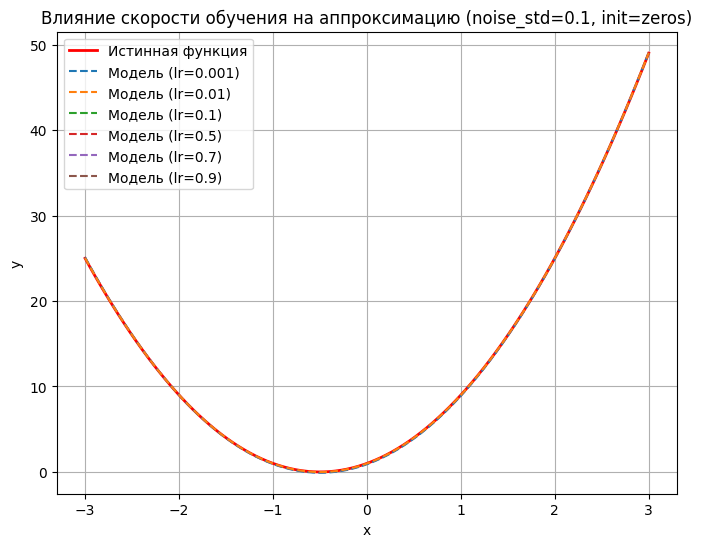

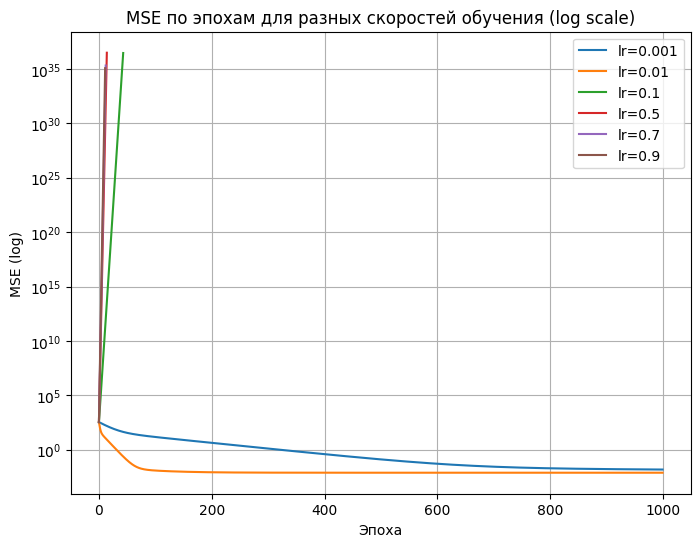


Итоговые параметры и ошибки:
lr=0.001: a=0.8982, b=3.9904, c=4.0203, loss=0.014846
lr=0.01 : a=0.9864, b=3.9994, c=4.0056, loss=0.007568
lr=0.1  : a=nan, b=nan, c=nan, loss=nan
lr=0.5  : a=nan, b=nan, c=nan, loss=nan
lr=0.7  : a=nan, b=nan, c=nan, loss=nan
lr=0.9  : a=nan, b=nan, c=nan, loss=nan


In [26]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

device = torch.device("cpu")
torch.manual_seed(42)

def generate_data(n_points=100, noise_std=0.1):
    x = torch.linspace(-3, 3, n_points).unsqueeze(1).to(device)
    y_true = 1 + 4 * x + 4 * x**2
    noise = noise_std * torch.randn_like(y_true)
    y = y_true + noise
    return x, y, y_true

learning_rates = [0.001, 0.01, 0.1, 0.5, 0.7, 0.9]
noise_std = 0.1
init_type = "zeros"
n_epochs = 1000

results = []
loss_curves = {}
predictions = {}

for lr in learning_rates:
    print(f"\nЭксперимент со скоростью обучения: lr = {lr}")
    x, y, y_true = generate_data(noise_std=noise_std)

    a = torch.zeros(1, requires_grad=True, device=device)
    b = torch.zeros(1, requires_grad=True, device=device)
    c = torch.zeros(1, requires_grad=True, device=device)
    print(f"Начальная инициализация: a={a.item():.4f}, b={b.item():.4f}, c={c.item():.4f}")

    optimizer = optim.SGD([a, b, c], lr=lr)
    loss_history = []

    for epoch in range(n_epochs):
        y_pred = a + b * x + c * x**2
        loss = torch.mean((y - y_pred)**2)
        loss_history.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    results.append({'lr': lr, 'a': a.item(), 'b': b.item(), 'c': c.item(), 'final_loss': loss.item()})
    loss_curves[lr] = loss_history
    predictions[lr] = (a + b * x + c * x**2).detach()

x_np = x.cpu().numpy()
y_true_np = y_true.cpu().numpy()

plt.figure(figsize=(8,6))
plt.plot(x_np, y_true_np, 'r', linewidth=2, label="Истинная функция")
for lr in learning_rates:
    plt.plot(x_np, predictions[lr].cpu().numpy(), '--', label=f"Модель (lr={lr})")
plt.title("Влияние скорости обучения на аппроксимацию (noise_std=0.1, init=zeros)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(8,6))
for lr in learning_rates:
    plt.plot(loss_curves[lr], label=f"lr={lr}")
plt.yscale('log')
plt.title("MSE по эпохам для разных скоростей обучения (log scale)")
plt.xlabel("Эпоха")
plt.ylabel("MSE (log)")
plt.legend()
plt.grid(True)
plt.show()

print("\nИтоговые параметры и ошибки:")
for res in results:
    print(f"lr={res['lr']:<5}: a={res['a']:.4f}, b={res['b']:.4f}, c={res['c']:.4f}, loss={res['final_loss']:.6f}")

Результаты.

При малых скоростях обучения (например, 0.001) оптимизация происходит устойчиво, но очень медленно, и итоговая ошибка остаётся немного выше оптимальной. При скорости 0.01 достигается баланс между скоростью и стабильностью сходимости. Однако при дальнейшем увеличении скорости обучения (от 0.1 и выше) процесс становится нестабильным, и параметры модели начинают расходиться, что выражается в появлении значений “nan” (ошибка вычислений из-за взрыва градиентов). Эксперимент подтверждает, что слишком малые значения замедляют обучение, а слишком большие приводят к потере сходимости.